In [7]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
# memuat data
data = pd.read_csv("/content/weather_data.csv")
data.head()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26


In [9]:
print (data.dtypes)

Year                   int64
Day                    int64
Wind Speed           float64
Specific Humidity    float64
Relative Humidity    float64
Precipitation        float64
Temperature          float64
dtype: object


In [14]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:7]  #independent colums
y = data.iloc[:,1]    # target colum i.e price range

In [15]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [16]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs          Score
1                Day  742465.068898
5      Precipitation   66394.131321
4  Relative Humidity   24419.592806
3  Specific Humidity   22064.315968
6        Temperature    8361.769328
2         Wind Speed     779.537308
0               Year       0.211411


In [17]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [18]:
# memuat data
data = pd.read_csv("/content/weather_data.csv")
X = data.iloc[:,0:7]  #independent columns
y = data.iloc[:,1]    #target column i.e price range

In [19]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09072055 0.34776994 0.11664716 0.11589869 0.11653002 0.09119018
 0.12124346]


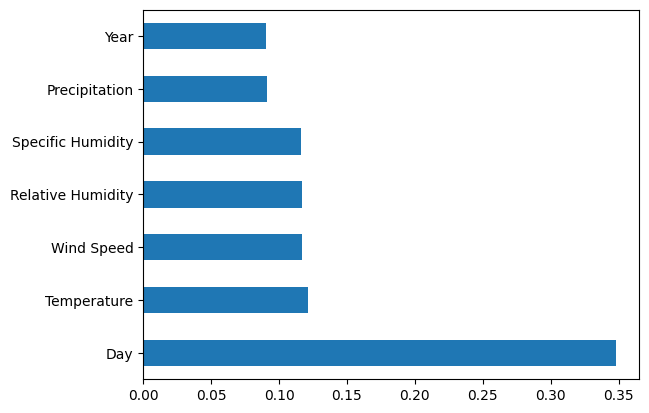

In [20]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
# memuat data
data = pd.read_csv("/content/weather_data.csv")
X = data.iloc[:,0:7]  #independent columns
y = data.iloc[:,1]    #target column i.e price range

In [23]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

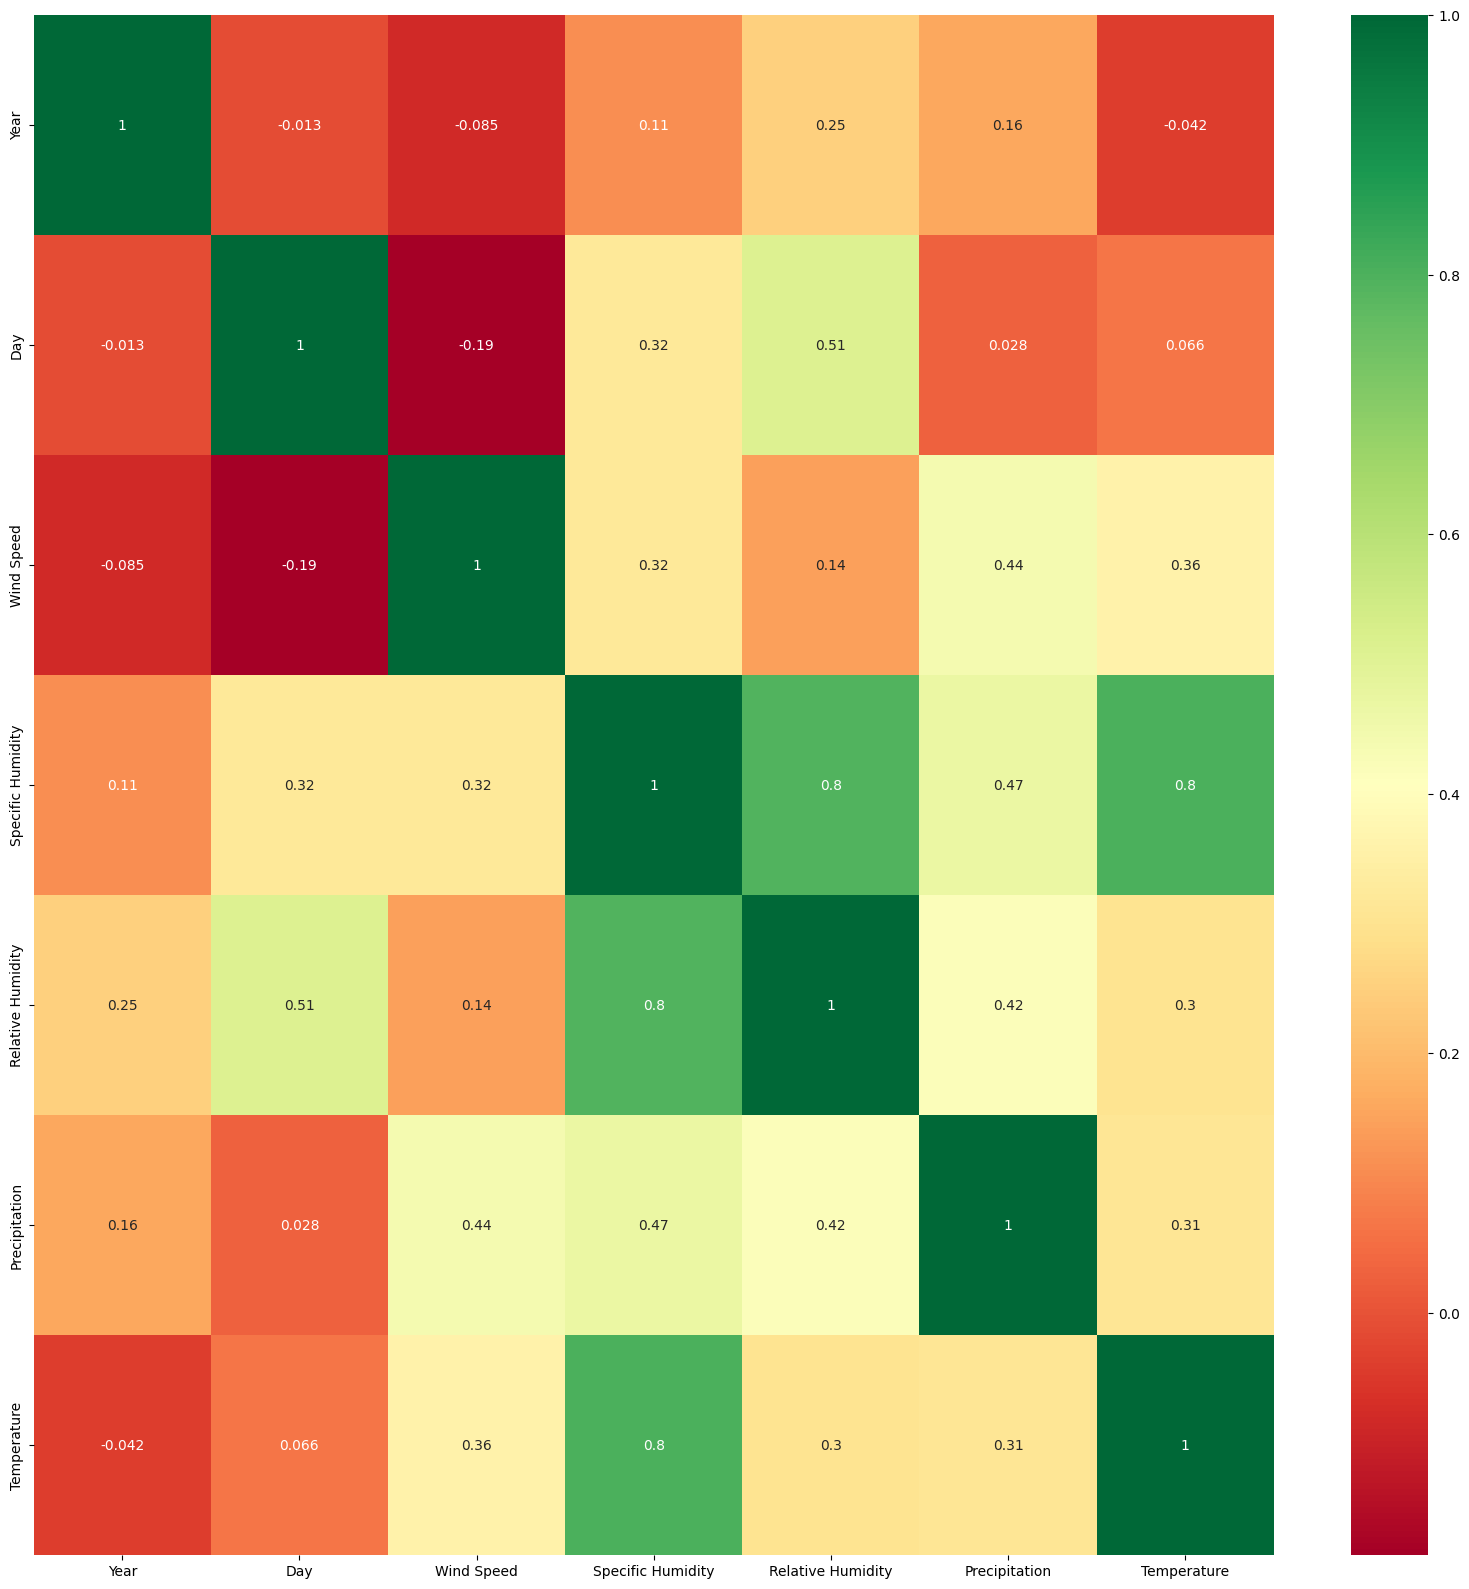

In [24]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Kesimpulan

- Korelasi antara Temperatur dengan fitur lainnya dimana ada relasi yang kuat dengan variable Specific Humidity, diikuti oleh Wind Speed, Precipitation, Relative Humidity.
- Dan untuk variable Year berkorelasi lemah dengan Temperatur.